# 2. Basic R

R is a free and open source programming language and software framework for statistical analysis and visualisation. It has a huge number of software extensions called libraries that allow us to easily manipulate data and implement machine learning algorithms. Before we delve into details, let's load some example data to simulate a typical analytical situation.

## 2.1 Example Pipeline

### 2.1.1 Loading Data

Here we will using the Melbourne Housing dataset. This is a free dataset available as a csv file for download. We can import it into R using `read.csv()` and quickly inspect it using `head()`.

In [1]:
df <- read.csv('Melbourne_housing.csv')

head(df)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,3/09/2016,2.5,3067,⋯,1,1,126,NA,NA,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,⋯,1,1,202,NA,NA,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,4/02/2016,2.5,3067,⋯,2,1,0,NA,NA,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,⋯,2,1,94,NA,NA,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019


`read.csv()` and `head()` are called functions, and have the same syntax as functions in mathematics $f(x)$. Like functions in maths, they take inputs ($x$), or arguments, and produce an output ($f(x)$). `read.csv()` takes a file path as argument, and returns the data from the csv so we can assign it to the _variable_ `df` using the assignment operator `'<-'`. The file path is put in quotation marks so that R recognises it as a character variable, or as raw text. We choose the name `df` because tables of data like this are represented in R as objects called _DataFrames_. The `head()` function takes a dataframe as input and prints the first 6 rows of the dataframe so we can quickly check the data.

### 2.1.2 Subsetting and Conditioning

Let's say we're only interested in a small subset of variables. We can refer to any single column in our dataframe in R using the syntax `df$column_name`.

In [2]:
head(df$Rooms)

[1] 2 2 2 3 3 3

Similarly, we can refer to any subset of our dataframe using the format `df[columns]` or `df[rows,columns]`. Indexing can be done with either column and row names or column and row index. For example, we can select the first 6 values of the `Rooms` column using:

In [3]:
df[1:6,'Rooms']

[1] 2 2 2 3 3 3

Before we subset our dataframe, let's first get a list of our column names using `colnames()`.

In [4]:
colnames(df)

[1] "Suburb"        "Address"       "Rooms"         "Type"         
 [5] "Price"         "Method"        "SellerG"       "Date"         
 [9] "Distance"      "Postcode"      "Bedroom2"      "Bathroom"     
[13] "Car"           "Landsize"      "BuildingArea"  "YearBuilt"    
[17] "CouncilArea"   "Lattitude"     "Longtitude"    "Regionname"   
[21] "Propertycount"

The column names are in inverted commas because they're character objects too. Let's subset the dataframe to include only the `Suburb`, `Rooms`, `Price`, `Car` and `BuildingArea` columns. We will reassign the output to `df` to overwrite the `df` variable. To use multiple column names as indices, we will need to make them into a _vector_ object using the syntax `c()`.

In [5]:
df <- df[c('Suburb', 'Rooms', 'Price', 'Car', 'BuildingArea')]

head(df)

Suburb,Rooms,Price,Car,BuildingArea
<fct>,<int>,<int>,<int>,<dbl>
Abbotsford,2,NA,1,NA
Abbotsford,2,1480000,1,NA
Abbotsford,2,1035000,0,79
Abbotsford,3,NA,1,NA
Abbotsford,3,1465000,0,150
Abbotsford,3,850000,1,NA


Now say we want to look only at houses from the suburb `Brunswick`. This subsetting is conditional on the value in the `Suburb` column, so we use a method called conditional indexing. The following will return only the rows for which the value in the `Suburb` column (`df$Suburb`) is equal to the string `"Brunswick"`.

In [6]:
df_sub <- df[df$Suburb == 'Brunswick',]

If we want to subset to look at suburbs from either `Brunswick`, `Hawthorn` or `Craigieburn`, we would make use of the _or_ operator `'|'`.

In [7]:
df_sub <- df[(df$Suburb == "Brunswick") | (df$Suburb == "Hawthorn") | (df$Suburb == "Craigieburn"), ]

head(df_sub)

,Suburb,Rooms,Price,Car,BuildingArea
,<fct>,<int>,<int>,<int>,<dbl>
2140,Brunswick,2,428000,2,NA
2141,Brunswick,2,1026000,0,108
2142,Brunswick,4,1802500,1,93
2143,Brunswick,4,1500000,1,209
2144,Brunswick,3,NA,NA,NA
2145,Brunswick,2,665000,NA,NA


One thing we notice is that there are many missing values in our columns! These are the `NA` values in our table. Unfortunately these are extremely common in most datasets, but will often lead to errors when we try to implement statistical analytics methods and machine learning algorithms. In many cases it's easier to just remove the rows containing `NA`'s. We can do this using the `na.omit()` function.

In [8]:
df_sub <- na.omit(df_sub)

### 2.1.3 Data Exploration

Now that we've subset the data, we can easily get statistical summaries of each remaining variable using the `summary()` function.

In [9]:
summary(df_sub)

          Suburb        Rooms           Price              Car      
 Brunswick   :171   Min.   :1.000   Min.   : 272500   Min.   :0.00  
 Craigieburn :120   1st Qu.:2.000   1st Qu.: 550000   1st Qu.:1.00  
 Hawthorn    :116   Median :3.000   Median : 740000   Median :1.00  
 Abbotsford  :  0   Mean   :2.966   Mean   :1040339   Mean   :1.42  
 Aberfeldie  :  0   3rd Qu.:4.000   3rd Qu.:1305000   3rd Qu.:2.00  
 Airport West:  0   Max.   :6.000   Max.   :7650000   Max.   :6.00  
 (Other)     :  0                                                   
  BuildingArea   
 Min.   :   0.0  
 1st Qu.:  89.0  
 Median : 122.2  
 Mean   : 138.2  
 3rd Qu.: 171.0  
 Max.   :1041.0  
                 

To look at the distribution of a single variable we can use the `hist()` function to produce a histogram.

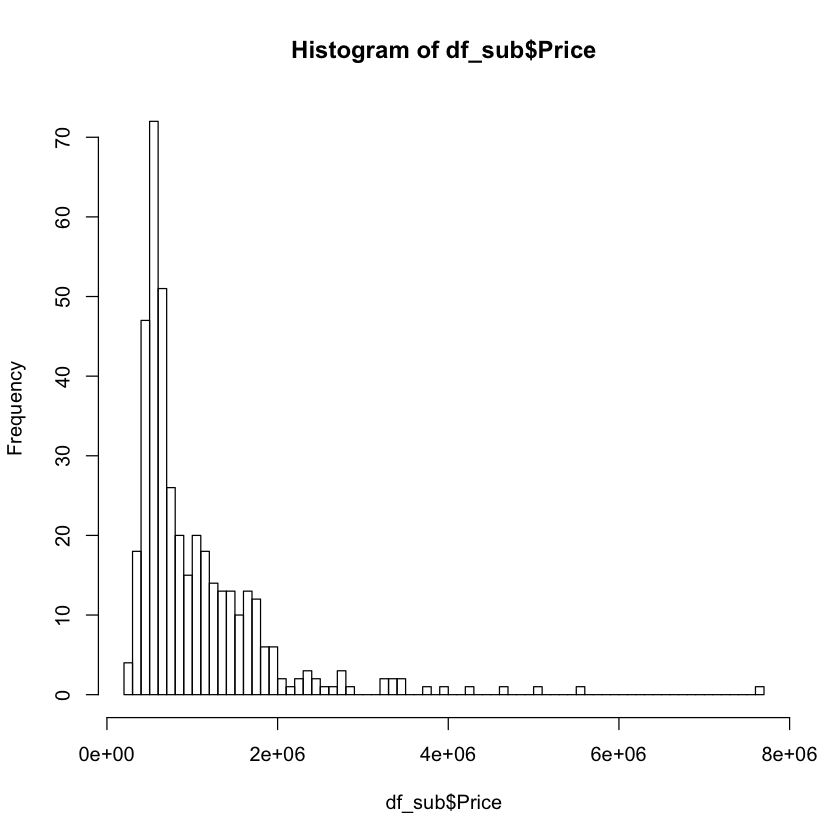

In [10]:
hist(df_sub$Price, breaks = 80)

Similarly, we can visualise the relationship between two variables by using the `plot()` function to produce a scatter plot.

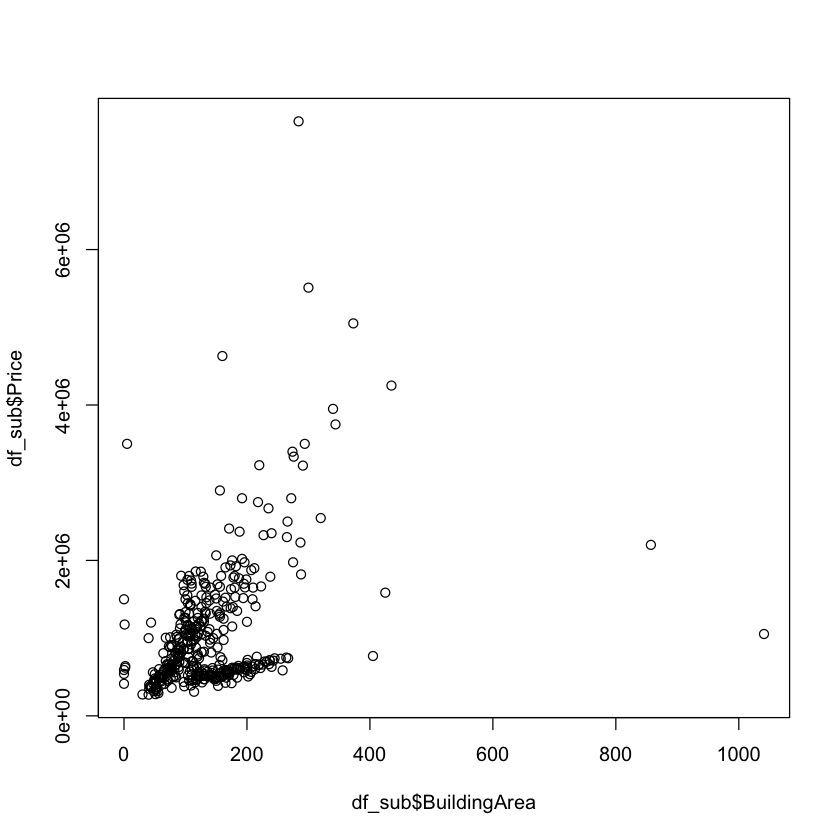

In [11]:
plot(df_sub$BuildingArea, df_sub$Price)

It looks like there is some relationship between the `BuildingArea` variable and the `Price` variable.

### 2.1.4 Analysis

Let's build a linear regression model of `Price` as a function of `BuildingArea` using the `lm()` function in R, where lm stands for Linear Model. The first argument is what's called a formula argument, and it determines our target variable and our predictor variables in the model. To predict `Price` as a function of `BuildingArea`, we write `Price ~ BuildingArea`.

In [12]:
model <- lm(Price ~ BuildingArea, df_sub)

summary(model)


Call:
lm(formula = Price ~ BuildingArea, data = df_sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-3417496  -466819  -162057   261974  6055816 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  515091.4    67813.3   7.596 2.14e-13 ***
BuildingArea   3799.6      413.2   9.195  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 737400 on 405 degrees of freedom
Multiple R-squared:  0.1727,	Adjusted R-squared:  0.1707 
F-statistic: 84.55 on 1 and 405 DF,  p-value: < 2.2e-16


The `summary()` function now produces a summary of the linear model, including information on residuals, coefficients, and accuracy statistics such as $R^2$. We can plot the linear fit using the `abline()` function with coefficients obtained from the regression model.

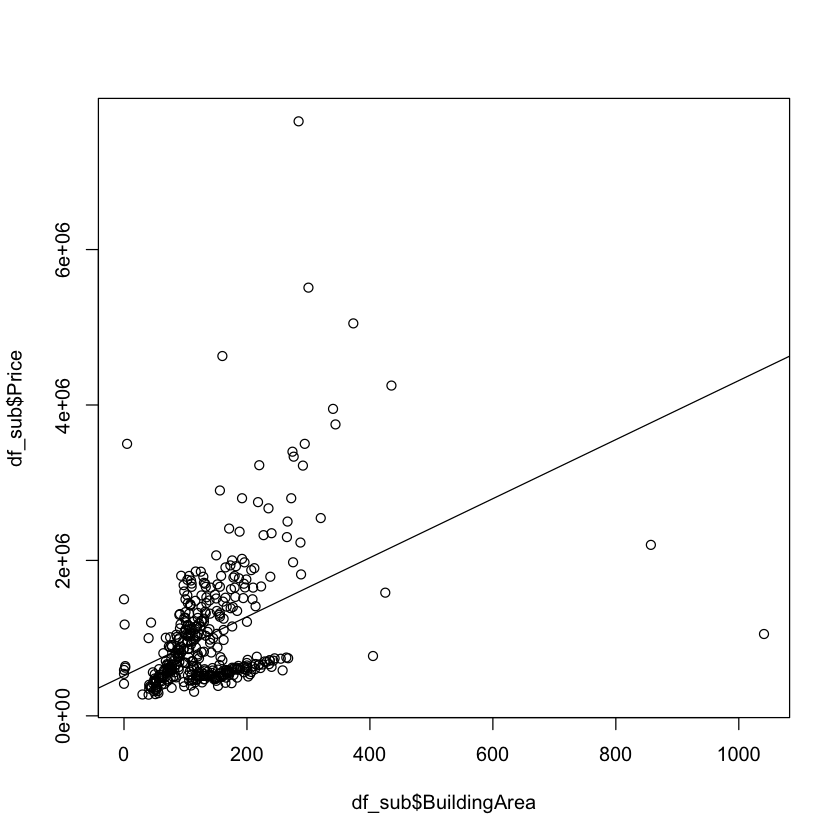

In [13]:
intercept <- model$coefficients[[1]]
b1 <- model$coefficients[[2]]

plot(df_sub$BuildingArea, df_sub$Price)
abline(intercept,b1)

Finally, let's try to improve the model by including the Suburb as a predictor variable. We can do this just by modifying the formula argument. We can use `Price ~ BuildingArea + Suburb`.

In [14]:
model <- lm(Price ~ BuildingArea + Suburb, df_sub)

summary(model)


Call:
lm(formula = Price ~ BuildingArea + Suburb, data = df_sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-4065970  -248931   -29854   164908  5482836 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        507915.8    64119.3   7.921 2.31e-14 ***
BuildingArea         4429.4      351.4  12.604  < 2e-16 ***
SuburbCraigieburn -658868.3    74665.9  -8.824  < 2e-16 ***
SuburbHawthorn     401285.6    74298.1   5.401 1.13e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 616700 on 403 degrees of freedom
Multiple R-squared:  0.4241,	Adjusted R-squared:  0.4198 
F-statistic: 98.93 on 3 and 403 DF,  p-value: < 2.2e-16


The model is considerably improved, with a new $R^2$ of 0.4. That means our linear fit explains 40% of the variance in the data! It also means that the suburb is a strong predictor of price! We can visualise this by plotting linear regression models for each suburb.

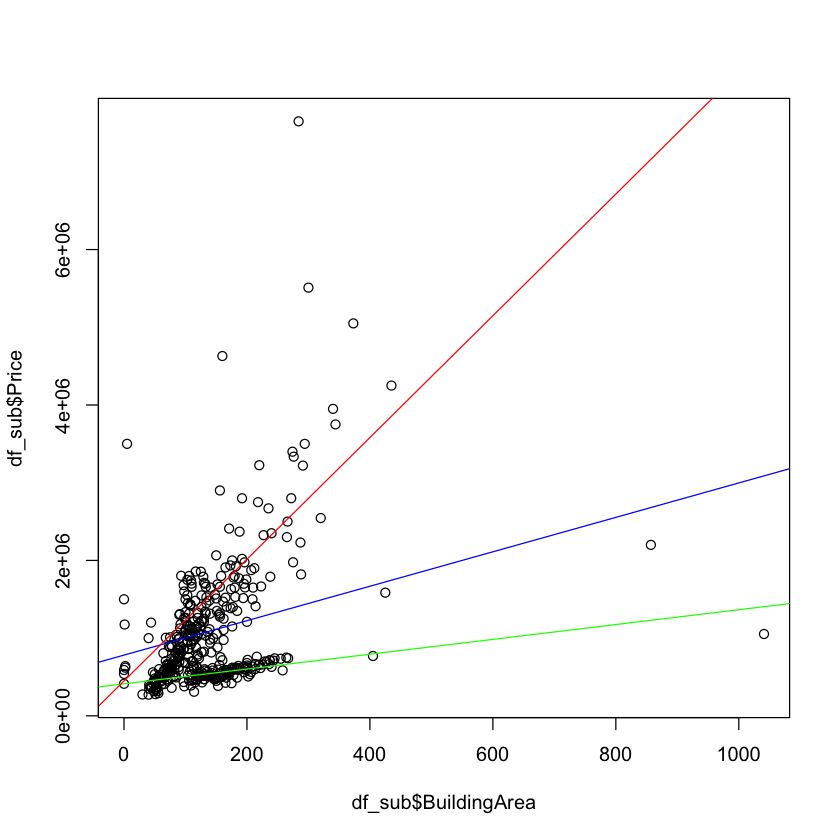

In [15]:
# To fit a linear regression for each suburb we use the lm() function and subset by suburb
model_br <- lm(Price ~ BuildingArea, df_sub[df_sub$Suburb == 'Brunswick',])
model_cr <- lm(Price ~ BuildingArea, df_sub[df_sub$Suburb == 'Craigieburn',])
model_ha <- lm(Price ~ BuildingArea, df_sub[df_sub$Suburb == 'Hawthorn',])

# Now let's plot the original data with plot()
plot(df_sub$BuildingArea, df_sub$Price)

# Now we can overlay the linear fits for Brunswick in blue, Craigieburn in green and Hawthorn in red
# A cool trick with abline() is that it accepts linear models from lm() as an argument, so we can write:
abline(model_br, col = 'blue')
abline(model_cr, col = 'green')
abline(model_ha, col = 'red')

Now let's make some predictions. We first need to make a new dataframe from scratch with our predictor values.

In [16]:
new <- data.frame(BuildingArea = 100, Suburb = 'Hawthorn')

predict(model, new, interval = "confidence")

fit,lwr,upr
1352146,1236960,1467332


Our hypothetical house has a predicted price of 1.35 million, with a 95% confidence of falling between 1.24 and 1.47 million.

## 2.2 Data Types

Formally, attributes can be categorised into four types: nominal, ordinal, interval and ratio.

**Nominal** data is categorical, and represents a label. Examples include ZIP codes, employee ID or TRUE and FALSE.

**Ordinal** data has an implied sequence, such as movie review scores, quality of diamonds and academic grades.

**Interval** data is quantitative in that the difference between two values is meaningful. Examples include the time of day, geographic coordinates and temperature in celsius or farenheit.

**Ratio** data is data for which both the difference and the ratio between two values is meaningful. Examples are temperature in Kelvin, counts, length, weight.

### 2.2.1 Numeric, Character and Logical Data Types

Like most other programming languages, R supports numeric, character and logical datatypes. We can create variables of each data type as follows.

In [17]:
i <- 1 # create a numeric variable
sport <- "football" # create a character variable 
flag <- TRUE # create a logical variable

### 2.2.2 Vectors

Vectors in R are like vectors in maths, just an ordered collection of objects! However, we can only construct vectors of objects in the same class.

In [18]:
u <- c("red", "yellow", "blue") # create a vector "red" "yellow" "blue"
u # returns "red" "yellow" "blue"
u[1] # returns "red" (1st element in u)
v <- 1:5 # create a vector 1 2 3 4 5
v # returns 1 2 3 4 5
sum(v) # returns 15
w <- v * 2 # create a vector 2 4 6 8 10
w # returns 2 4 6 8 10
w[3] # returns 6 (the 3rd element)
z <- v + w # sums two vectors element by element
z # returns 3 6 9 12 15
z > 8 # returns FALSE FALSE TRUE TRUE TRUE
z[z > 8] # returns 9 12 15
z[z > 8 | z < 5]; # returns 3 9 12 15 ("|" denotes "or")

[1] "red"    "yellow" "blue"

[1] "red"

[1] 1 2 3 4 5

[1] 15

[1]  2  4  6  8 10

[1] 6

[1]  3  6  9 12 15

[1] FALSE FALSE  TRUE  TRUE  TRUE

[1]  9 12 15

[1]  3  9 12 15

### 2.2.3 Factors

Another good way of getting an overview of a dataframe is using the `str()` function.

In [19]:
str(df_sub)

'data.frame':	407 obs. of  5 variables:
 $ Suburb      : Factor w/ 351 levels "Abbotsford","Aberfeldie",..: 50 50 50 50 50 50 50 50 50 50 ...
 $ Rooms       : int  2 4 4 4 2 1 3 2 3 4 ...
 $ Price       : int  1026000 1802500 1500000 2230000 410000 272500 680000 400000 950000 860000 ...
 $ Car         : int  0 1 1 3 1 1 1 1 0 1 ...
 $ BuildingArea: num  108 93 209 287 66 40 100 61 96 97 ...
 - attr(*, "na.action")= 'omit' Named int  1 5 6 7 8 10 14 15 18 19 ...
  ..- attr(*, "names")= chr  "2140" "2144" "2145" "2146" ...


This is a bit like the transpose of the `head()` function, and it gives us information about the data types present in each column of the dataframe. We can distinguish three data types: `Factor`, `int`, and `num`. `int` indicates an integer value while `num` indicates a floating point representation of a decimal value. A `Factor` is a way of representing categorical variables in R, where each factor level is a category of the attribute. Typically when we use `read.csv()` R will interpret character variables as factors, with each disttinct string of characters as a factor level. We can convert a column to factor representation using the function `as.factor()`.

In [20]:
df_sub$Rooms <- as.factor(df_sub$Rooms)

class(df_sub$Rooms)

[1] "factor"

The `class()` function, which returns the data type of variables, tells us that the `Rooms` column is now a factor. We can convert it back using `as.integer()` or `as.numeric()`.

In [21]:
df_sub$Rooms <- as.integer(df_sub$Rooms)

class(df_sub$Rooms)

[1] "integer"

## 2.3 Descriptive Statistics

R has several inbuilt functions for computing summary statistics of one or more variables. To simplify the function calls we can assign two columns to variables `x` and `y`.

In [22]:
x <- df_sub$BuildingArea
y <- df_sub$Price

In [23]:
cor(x,y) # returns correlation
cov(x,y) # returns covariance
IQR(x) # returns interquartile range
mean(x) # returns mean
median(x) # returns median
range(x) # returns (min, max)
sd(x) # returns std. dev.
var(x) # returns variance

[1] 0.415593

[1] 29800433

[1] 82

[1] 138.2368

[1] 122.25

[1]    0 1041

[1] 88.56073

[1] 7843.003

## 2.4 Visualisation

Visualisation is a powerful tool because a good plot can tell a story in a much more intuitive way than any statistical property. This is because humans are extremely good at identifying patterns, and so can understand a dataset much more effective when presented visually. We can visualise the distributions of single variables in our datasets using histograms and density plots. We can also investegate relationships between variables using scatter plots and line plots. By including more information, by including more information in the form of colours, sizes and shapes in our plots, we can visualise high dimensional datasets and intuitively understand multivariate relationships.

### 2.4.1 Visualisation of a Single Variable

Let's use the library `ggplot2` to create a **density plot** of the price variable using the function `ggplot()`. `ggplot2()` is a powerful and highly customisable visualisation tool in R. We can install the `ggplot2` library by typing `install.packages('ggplot2')`. Once installed, we can load the library using the `library()` function.

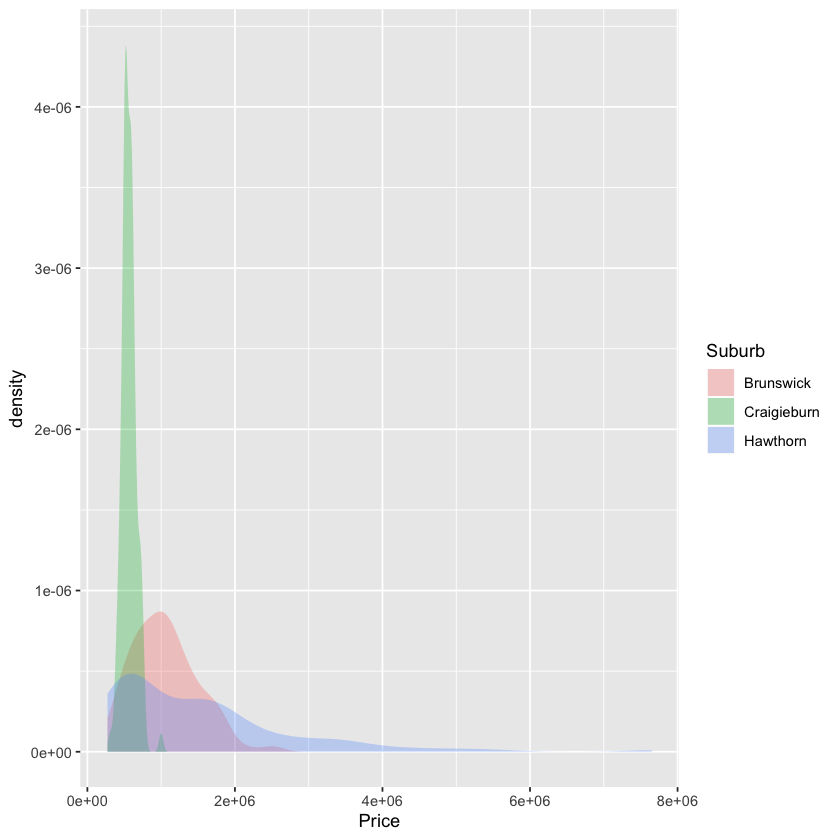

In [24]:
library("ggplot2")

ggplot(df_sub, aes(x=Price, fill=Suburb)) + geom_density(alpha = .3, color=NA)

The `ggplot()` function takes as argument the dataframe containing our data, `df_sub` and an `aes()` argument, which determines the x axis values and the `fill` variable. The `fill` variable allows us to visualise different categories of data in different colours, here we use the `Suburb` variable as our colour parameter. The density plot is generated by the `geom_density()` function.

We can show more detail in the distributions by using a logarithmic scale for the Price variable. To do this we use the `log10()` function.

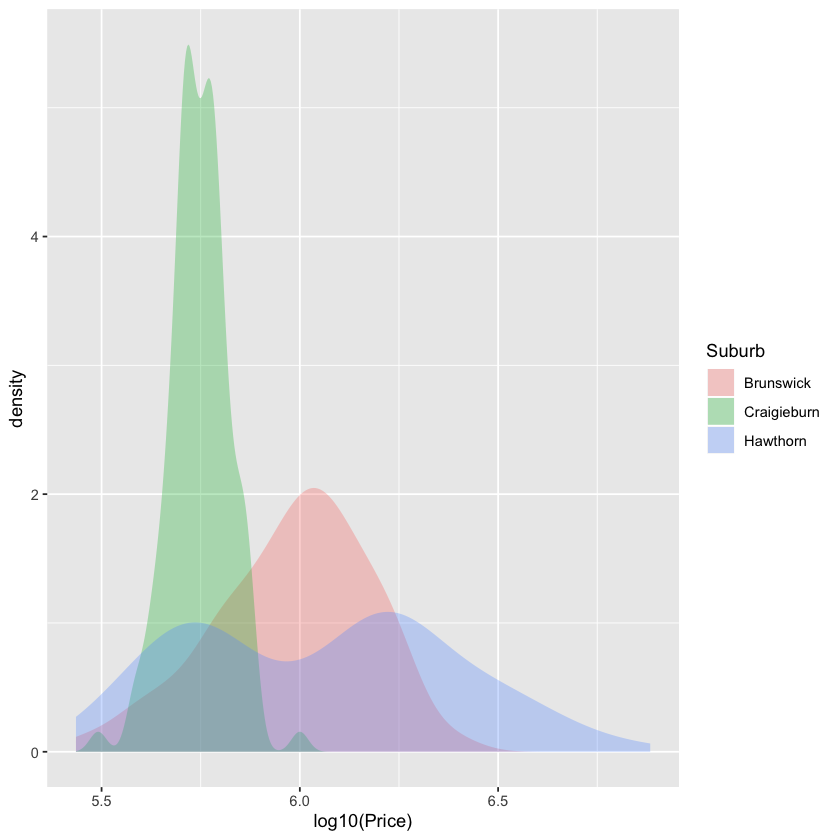

In [25]:
ggplot(df_sub, aes(x=log10(Price), fill=Suburb)) + geom_density(alpha = .3, color=NA)

We can also use a **Box-and-Whisker plot** to compare distributions between categories. The following code produces a Box-and-Whisker plot with Suburb on the x-axis and the base-10 logarithm of Price on the y axis. 

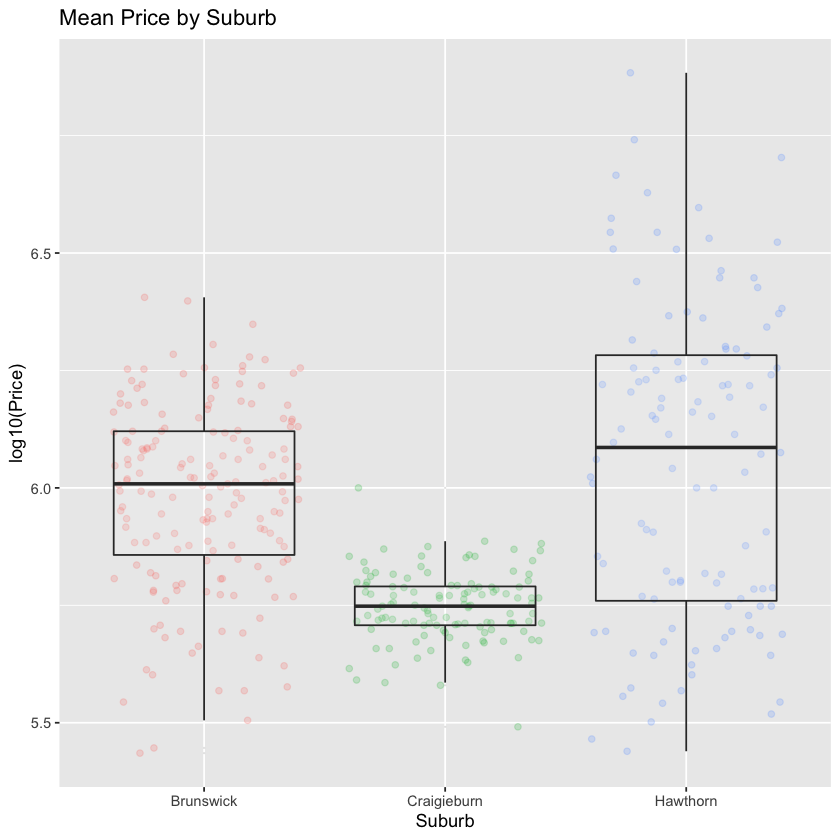

In [26]:
ggplot(data=df_sub, aes(x=Suburb, y=log10(Price))) +
geom_point(aes(color=Suburb), alpha=0.2, position="jitter") + geom_boxplot(outlier.size=0, alpha=0.1) +
guides(colour=FALSE) +
ggtitle ("Mean Price by Suburb")

The `geom_boxplot()` function generates a boxplot using the data supplied in `ggplot()`, while the `geom_point()` function overlays a scatter plot coloured by Suburb.

### 2.4.2 Visualisation of Multiple Variables

We can identify and communicate key relationships between variables using visualisation. We can plot the relationships between two variables using a scatterplot, here of Price against BuildingArea, and we can add colour to represent Suburb, and size to represent Rooms. This way we can visualise 4 separate dimensions of our data in one visualisation.

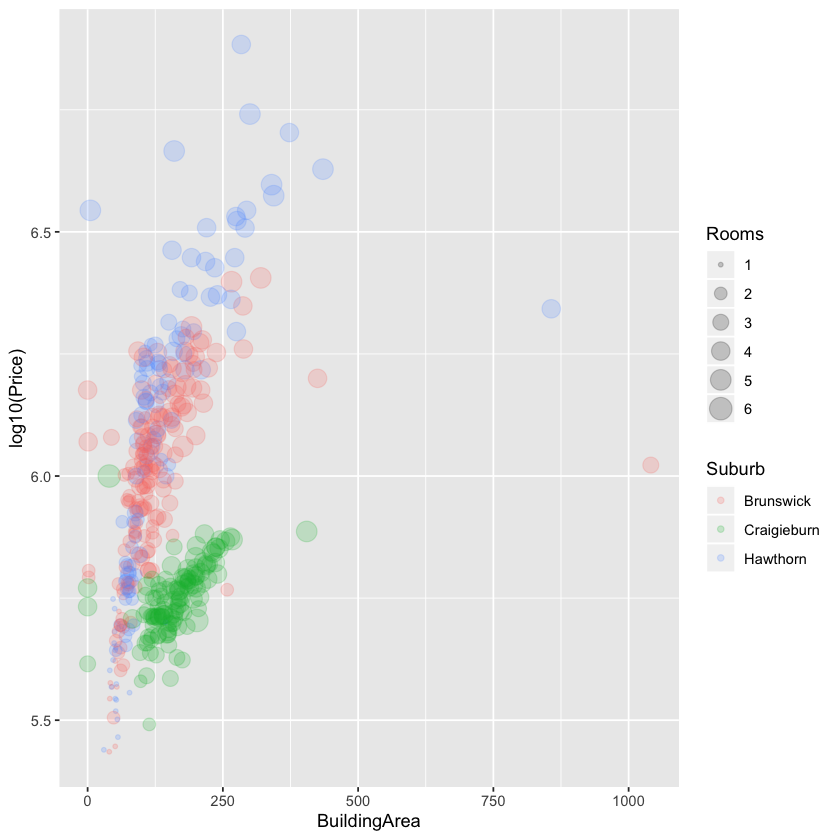

In [27]:
ggplot(data=df_sub, aes(x=BuildingArea, y=log10(Price))) +
geom_point(aes(color=Suburb, size=Rooms), alpha=0.2)

### Anscombe's Quartet

The importance of visualisation can be demonstrated using Anscombe's quartet, four datasets constructed by Francis Anscombe. The datasets are included in standard R, along with many other popular datasets, and can be loaded into our workspace using the function `data()`.

In [28]:
data(anscombe)
head(anscombe)

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04


The statistical properties of each dataset are near identical, as shown in the table below.

| Statistic              | Value        |
|------------------------|--------------|
| Mean of x              | 9            |
| Variance of x          | 11           |
| Mean of y              | 7.50         |
| Variance of y          | 4.12         |
| Correlation of x and y | 0.816        |
| Regression line        | y=3.00+0.50x |




Based on this table, one could conclude that the datasets are drawn from the same statistical distribution, with a common mean and variance for x and y. Visualisation of the datasets, however, tells a different story.

We will use the `ggplot2` library to visualise the datasets. First, we need to group the x and y values into a common column, and add a `mygroup` column to indicate which dataset each point belongs to.

In [29]:
levels <- gl(4, nrow(anscombe))
mydata <- with(anscombe, data.frame(x=c(x1,x2,x3,x4), y=c(y1,y2,y3,y4), mygroup=levels))

head(mydata)

x,y,mygroup
<dbl>,<dbl>,<fct>
10,8.04,1
8,6.95,1
13,7.58,1
9,8.81,1
11,8.33,1
14,9.96,1


We can now load the `ggplot2` library and create a scatter plot for each dataset in the quartet. We can also overlay linear regression lines for each.

The `geom_point()` function generates a scatter plot from those x and y values, and in this example takes a single argument, `size`. `geom_smooth()` fits a smoothed line to our data, and specifying `method="lm"` generates a linear fit. The function `facet_wrap()` splits the scatter plot into subplots for each value of the `mygroup` column.

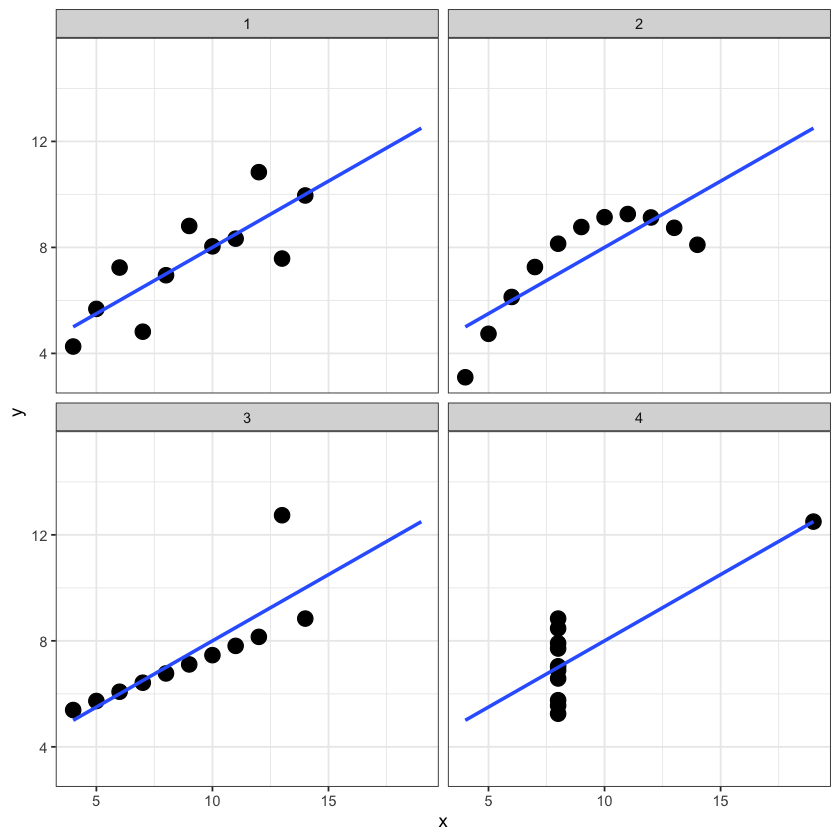

In [30]:
# Load library
library(ggplot2)
# set plot color theme
theme_set(theme_bw())
# create the four plots
ggplot(mydata, aes(x,y)) + geom_point(size=4) +
geom_smooth(method="lm", fill=NA, fullrange=TRUE) + facet_wrap(~mygroup)

Although the statistical properties and regression lines for each dataset are nearly identical, visualisation shows that the datasets themselves have very different trends! This kind of exercise shows the power of visualisation for analysis.

# Appendix

In the previous section we talked about various data structures (objects) in R, including vectors and dataframes. We also used indexing to subset a dataframe. In this addendum, we will look into indexing in a bit more detail. First we need to discuss another data structure in R, also borrowed from mathematics, called a matrix.

## A.1 Arrays and Matrices

The `array()` function can be used to restructure a vector as an array. For example, the following R code builds a two dimensional matrix to hold the quarterly sales from three regions, and then assign the sales amount of $158,000 to the second region for the first quarter.

In [31]:
quarterly_sales <- array(0, dim=c(3,4))
quarterly_sales[2,1] <- 158000
quarterly_sales

0,0,0,0
158000,0,0,0
0,0,0,0


## A.2 Indexing with Vectors

In the previous sections, we looked at the `Melbourne_housing.csv` dataset and used a conditional statement to susbset the dataframe. For instance we used the statement `df$Suburb == 'Brunswick'` as an index to subset our dataframe to only rows where the Suburb is Brunswick. Let's load the dataset and investigate this statement more closely.

In [32]:
df <- read.csv('Melbourne_housing.csv')

head(df$Suburb == 'Brunswick')

[1] FALSE FALSE FALSE FALSE FALSE FALSE

It turns out that the statement is a vector of `TRUE` and `FALSE` logical values, one for each row, representing whether the statement is true or not for that row. In other words, the vector value is `TRUE` for each row where `Suburb` is `Brunswick` and `FALSE` everywhere else.

So we are indexing the rows of our dataframe using a **vector** of logical values!

In [33]:
is.vector(df$Suburb == 'Brunswick')

[1] TRUE

Let's store the vector as a variable and subset our original dataframe. Remember that we are indexing the **rows**, so we need to write `df[index, ]`, using the comma and the order `[rows,columns]`, to make that explicit!

In [34]:
index <- df$Suburb == 'Brunswick'

df_sub <- df[index,]

head(df_sub)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>
2140,Brunswick,8/55 De Carle St,2,u,428000,S,Brad,3/09/2016,5.2,3056,⋯,1,2,0,NA,1970,Moreland City Council,-37.7593,144.9652,Northern Metropolitan,11918
2141,Brunswick,234 Victoria St,2,h,1026000,S,Nelson,3/09/2016,5.2,3056,⋯,1,0,225,108,1905,Moreland City Council,-37.7676,144.9665,Northern Metropolitan,11918
2142,Brunswick,9 Blair St,4,h,1802500,S,Jellis,3/12/2016,5.2,3056,⋯,3,1,238,93,1910,Moreland City Council,-37.7713,144.9643,Northern Metropolitan,11918
2143,Brunswick,25 Hardy St,4,h,1500000,VB,Nelson,3/12/2016,5.2,3056,⋯,3,1,365,209,1890,Moreland City Council,-37.7624,144.9671,Northern Metropolitan,11918
2144,Brunswick,47 Amelia St,3,t,NA,S,Nelson,4/03/2017,5.2,3056,⋯,NA,NA,NA,NA,NA,Moreland City Council,NA,NA,Northern Metropolitan,11918
2145,Brunswick,2/11 Barningham St,2,t,665000,SP,Jellis,4/03/2017,5.2,3056,⋯,NA,NA,NA,NA,NA,Moreland City Council,NA,NA,Northern Metropolitan,11918


So indexing with vectors of logical values allows us to create conditional statements, such as `df$Suburb == 'Brunswick'`, with which to subset our dataframe.

Let's look at another example and subset our dataframe to only look at homes worth more than, say, a million dollars. Let's construct an index vector of logicals for that condition.

In [35]:
index <- df$Price > 1000000
head(index)

[1]    NA  TRUE  TRUE    NA  TRUE FALSE

Because our `Price` column contains `NA`s, our index vector also contains `NA`s since R is unable to evaluate the condition for those rows! We can either remove `NA`s before subsetting or after, the overall result is the same.

In [36]:
# Remove NA's before indexing
df_clean <- na.omit(df)
df_sub <- df_clean[df_clean$Price > 1000000,]
head(df_sub)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
7,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,⋯,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
12,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,⋯,2,0,245,210,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019
15,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,⋯,1,2,256,107,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019
19,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,⋯,1,2,220,75,1900,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019


In [37]:
# Remove NA's after indexing
df_sub <- df[df$Price > 1000000,]
df_clean <- na.omit(df_sub)
head(df_clean)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
7,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,⋯,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
12,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,⋯,2,0,245,210,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019
15,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,⋯,1,2,256,107,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019
19,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,⋯,1,2,220,75,1900,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019


## A.3 Indexing with Matrices

In the last section we indexed a dataframe using a vector of logicals. Now we will index a dataframe using a matrix of logicals. The vector index is one dimensional, so we can either index rows or columns using a vector. In the case of a matrix, each cell in the matrix corresponds to a cell in our original dataframe, so we can index both rows and columns simultaneously. In other words, instead of using the syntax `df[rows,columns]` we can use the syntax `df[matrix]`.

To do this lets load the `movielens_top40.csv` dataset. It tracks user reviews for the top 40 movies on movielens, with each review corresponding to a score on a scale from 0 to 5. `NA` values correspond to movies that haven't been reviewed. Let's load the data.

In [38]:
reviews <- read.csv('movielens_top40.csv')

head(reviews)

,user_1,user_6,user_7,user_15,user_17,user_18,user_19,user_21,user_28,user_39,⋯,user_596,user_597,user_599,user_600,user_602,user_603,user_606,user_607,user_608,user_610
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
Aladdin (1992),NA,5,3.0,3,NA,3.5,3,4.0,NA,4,⋯,NA,4,3.0,3.5,NA,NA,NA,NA,3,NA
American Beauty (1999),5,NA,4.0,4,4.0,NA,4,2.0,4.0,5,⋯,NA,5,5.0,4.5,NA,5,4.5,3,5,3.5
Apollo 13 (1995),NA,4,4.5,NA,3.5,NA,NA,NA,NA,NA,⋯,3.5,NA,2.5,2.0,4,NA,NA,5,2,NA
Back to the Future (1985),5,NA,5.0,5,4.5,4.0,4,5.0,NA,4,⋯,4.0,5,3.5,4.5,NA,2,3.5,3,2,5.0
Batman (1989),4,3,3.0,NA,4.5,NA,5,3.5,2.5,4,⋯,3.5,4,3.5,2.5,4,2,3.5,3,3,4.5
Braveheart (1995),4,5,NA,NA,4.5,4.5,NA,NA,3.5,NA,⋯,NA,5,3.5,2.0,5,1,3.5,5,4,4.5


As expected, our data contains lots of `NA`s! We need to be able to deal with them. If we simply drop `NA`s we will end up with no data at all.

In [39]:
dim(na.omit(reviews))

[1]   0 153

So instead we want to change the `NA`s to some other value, such as 0, that can be used in our analysis. To do this we need to reference each cell that contains an `NA`... and for that we will use a matrix index!

We can produce a logical matrix representing whether a cell contains an `NA` value in our dataframe using `is.na()`:

In [40]:
head(is.na(reviews))

,user_1,user_6,user_7,user_15,user_17,user_18,user_19,user_21,user_28,user_39,⋯,user_596,user_597,user_599,user_600,user_602,user_603,user_606,user_607,user_608,user_610
Aladdin (1992),TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
American Beauty (1999),FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
Apollo 13 (1995),TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
Back to the Future (1985),FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
Batman (1989),FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Braveheart (1995),FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


We can then use this matrix as an index to refer to each `NA` cell and reassign those values!

In [41]:
reviews[is.na(reviews)] <- 0
head(reviews)

,user_1,user_6,user_7,user_15,user_17,user_18,user_19,user_21,user_28,user_39,⋯,user_596,user_597,user_599,user_600,user_602,user_603,user_606,user_607,user_608,user_610
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aladdin (1992),0,5,3.0,3,0.0,3.5,3,4.0,0.0,4,⋯,0.0,4,3.0,3.5,0,0,0.0,0,3,0.0
American Beauty (1999),5,0,4.0,4,4.0,0.0,4,2.0,4.0,5,⋯,0.0,5,5.0,4.5,0,5,4.5,3,5,3.5
Apollo 13 (1995),0,4,4.5,0,3.5,0.0,0,0.0,0.0,0,⋯,3.5,0,2.5,2.0,4,0,0.0,5,2,0.0
Back to the Future (1985),5,0,5.0,5,4.5,4.0,4,5.0,0.0,4,⋯,4.0,5,3.5,4.5,0,2,3.5,3,2,5.0
Batman (1989),4,3,3.0,0,4.5,0.0,5,3.5,2.5,4,⋯,3.5,4,3.5,2.5,4,2,3.5,3,3,4.5
Braveheart (1995),4,5,0.0,0,4.5,4.5,0,0.0,3.5,0,⋯,0.0,5,3.5,2.0,5,1,3.5,5,4,4.5
